In [4]:
import numpy as np
import pandas as pd
import datetime
import time
import random
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Settings for synthetic data
DURATION_MINUTES = 230  # Duration of synthetic data collection
SAMPLING_RATE_HZ = 10   # Sampling rate (Hz)
NUM_SAMPLES = DURATION_MINUTES * 60 * SAMPLING_RATE_HZ
NUM_FEATURES = 5       # Number of features to generate
CSV_FILE_PATH = "synthetic_hardware_data.csv"

In [5]:

# Initialize lists to store synthetic data
timestamps = []
features_data = {f"feature_{i}": [] for i in range(NUM_FEATURES)}

In [6]:
# Generate synthetic data
start_time = datetime.datetime.now()
for i in range(NUM_SAMPLES):
    current_time = datetime.datetime.now()
    timestamps.append(current_time)

    # Generate synthetic multivariate data with normal patterns
    for feature in range(NUM_FEATURES):
        base_signal = np.sin(0.01 * i + feature)  # Base sine signal
        noise = np.random.normal(0, 0.1)        # Add Gaussian noise
        features_data[f"feature_{feature}"].append(base_signal + noise)

        # Introduce anomalies randomly (5% chance per feature)
        if random.random() < 0.05:
            features_data[f"feature_{feature}"][-1] += random.uniform(5, 10)

    # Save data periodically to CSV
    if i % 1000 == 0:
        data_to_save = {"timestamp": timestamps, **features_data}
        pd.DataFrame(data_to_save).to_csv(
            CSV_FILE_PATH, mode='a', index=False, header=(i == 0)
        )
        print(f"Saved up to sample {i}/{NUM_SAMPLES}")

Saved up to sample 0/138000
Saved up to sample 1000/138000
Saved up to sample 2000/138000
Saved up to sample 3000/138000
Saved up to sample 4000/138000
Saved up to sample 5000/138000
Saved up to sample 6000/138000
Saved up to sample 7000/138000
Saved up to sample 8000/138000
Saved up to sample 9000/138000
Saved up to sample 10000/138000
Saved up to sample 11000/138000
Saved up to sample 12000/138000
Saved up to sample 13000/138000
Saved up to sample 14000/138000
Saved up to sample 15000/138000
Saved up to sample 16000/138000
Saved up to sample 17000/138000
Saved up to sample 18000/138000
Saved up to sample 19000/138000
Saved up to sample 20000/138000
Saved up to sample 21000/138000
Saved up to sample 22000/138000
Saved up to sample 23000/138000
Saved up to sample 24000/138000
Saved up to sample 25000/138000
Saved up to sample 26000/138000
Saved up to sample 27000/138000
Saved up to sample 28000/138000
Saved up to sample 29000/138000
Saved up to sample 30000/138000
Saved up to sample 31

In [7]:
# Final save of the dataset
data_to_save = {"timestamp": timestamps, **features_data}
df = pd.DataFrame(data_to_save)
df.to_csv(CSV_FILE_PATH, mode='a', index=False, header=False)

print("Data generation complete. Dataset saved to CSV.")


Data generation complete. Dataset saved to CSV.


In [8]:
# ------------------------------
# Anomaly Detection and Plotting
# ------------------------------

# Load the dataset
df = pd.read_csv(CSV_FILE_PATH)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
anomaly_scores = iso_forest.fit_predict(df.iloc[:, 1:])  # Exclude timestamp column

# Add anomaly scores to the dataframe
df["anomaly"] = anomaly_scores

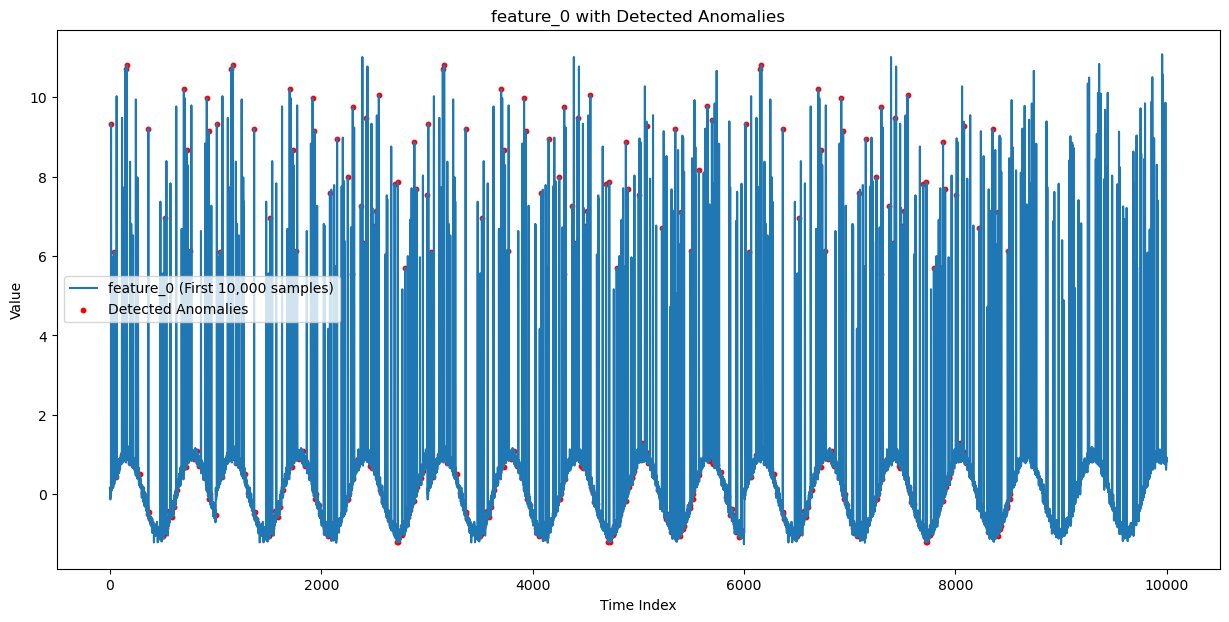

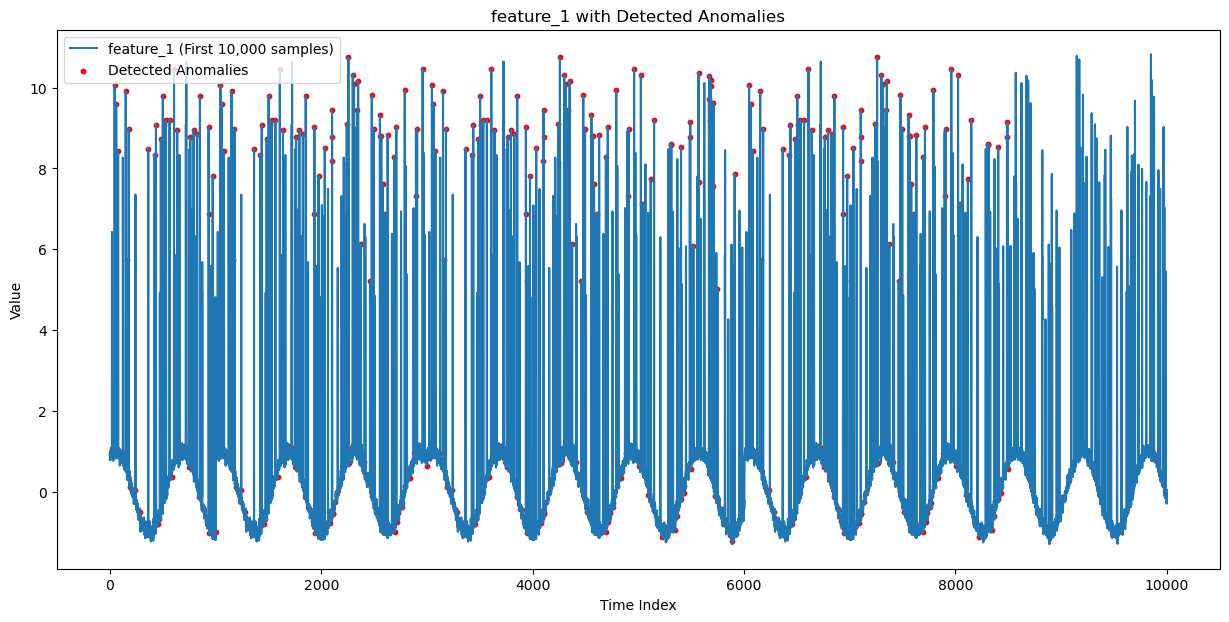

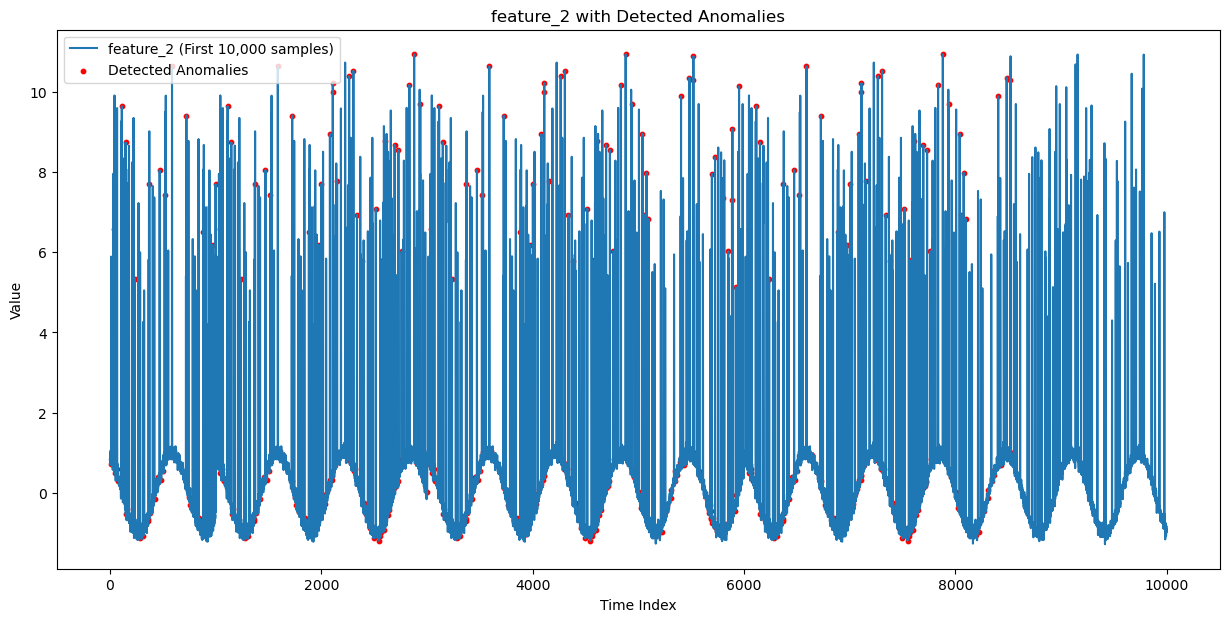

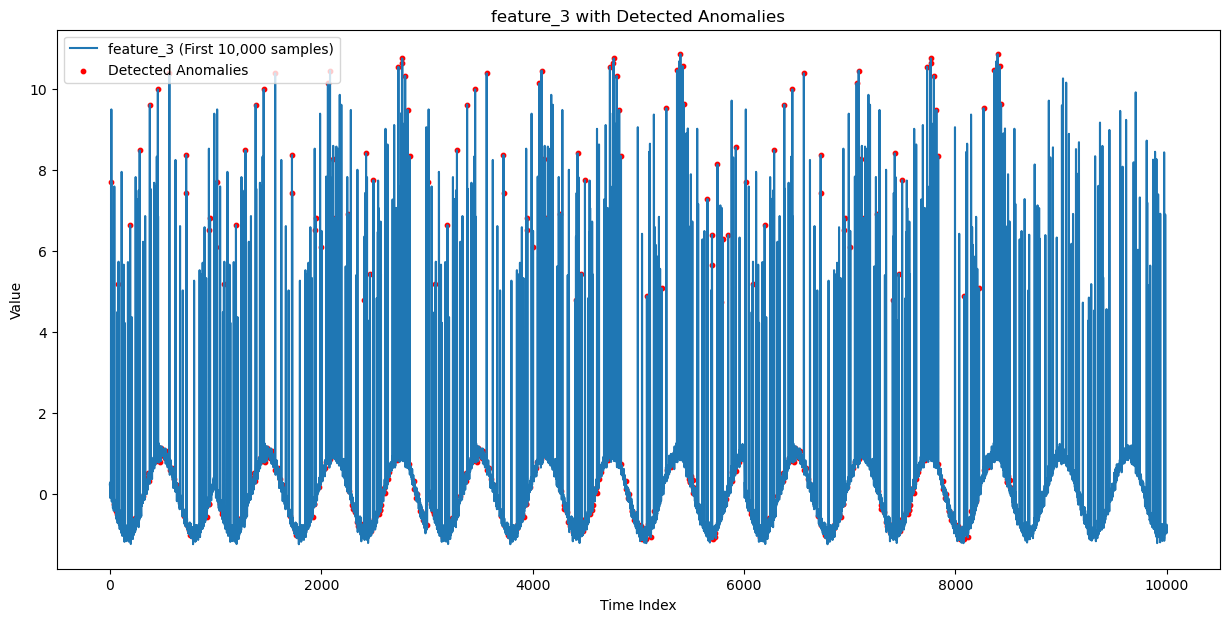

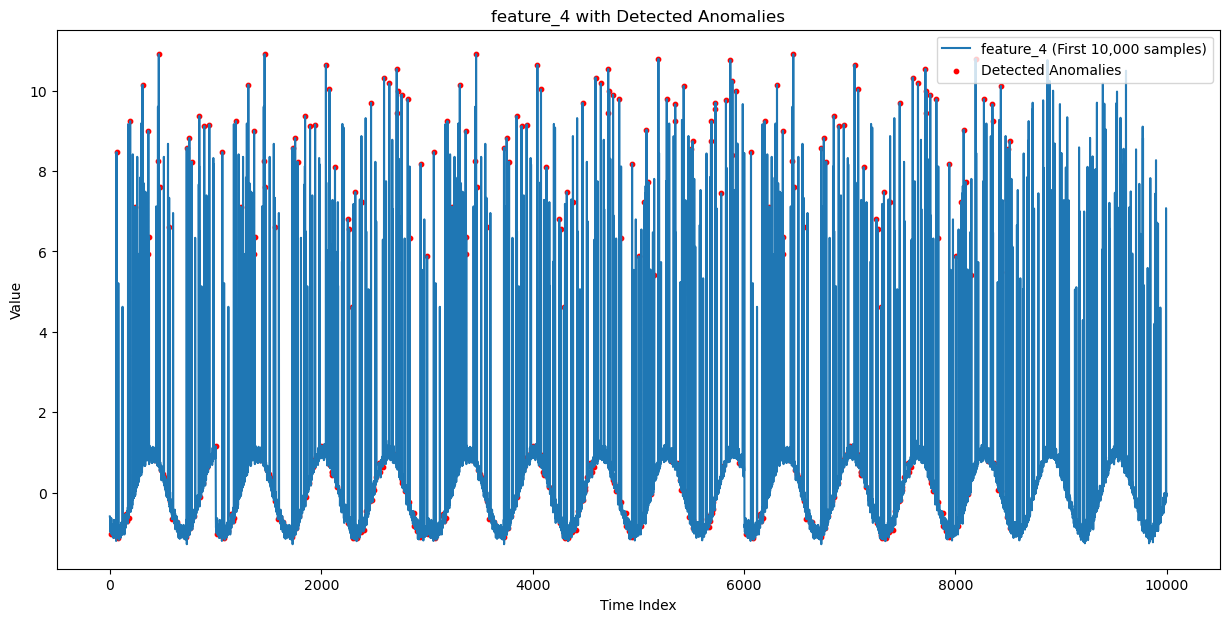

In [9]:
# Visualization: Plot all features with anomalies
features = [col for col in df.columns if col.startswith("feature_")]

for feature_name in features:
    plt.figure(figsize=(15, 7))
    plt.plot(df[feature_name][:10000], label=f'{feature_name} (First 10,000 samples)')
    anomalies = df[df["anomaly"] == -1]
    plt.scatter(
        anomalies.index[:500], anomalies[feature_name][:500],
        color="red", label="Detected Anomalies", s=10
    )
    plt.title(f"{feature_name} with Detected Anomalies")
    plt.xlabel("Time Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
